In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
def sigmoid(x):
    output = 1.0 / (1.0 + np.exp(-x))
    return output

def sigmoid_output_to_derivative(output):
    return output*(1-output)


In [3]:
X = np.array([
    [0,1],
    [0,1],
    [1,0],
    [1,0]
])
y = np.array([[0, 0, 1, 1]]).T

synapse_0 = np.empty((2,1))

In [7]:
synapse_0

array([[7.74860419e-304],
       [7.74860419e-304]])

In [4]:
x_range = np.linspace(-10, 10, 20, dtype=np.float)
y_range = np.linspace(-10, 10, 20, dtype=np.float)
errors = []

In [29]:
x_range.shape, y_range.shape

((20,), (20,))

In [10]:
x_range, y_range

(array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
         -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
         -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
          2.63157895,   3.68421053,   4.73684211,   5.78947368,
          6.84210526,   7.89473684,   8.94736842,  10.        ]),
 array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
         -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
         -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
          2.63157895,   3.68421053,   4.73684211,   5.78947368,
          6.84210526,   7.89473684,   8.94736842,  10.        ]))

In [11]:
# the error aggregation starts here
for _x in x_range:
    synapse_0[0] = _x
    for _y in y_range:
        synapse_0[1] = _y

        # apply the model to the input
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))

        # evaluate the error using the RMSE
        error = np.mean(np.sqrt((layer_1 - y) ** 2))
        errors.append(error)

In [13]:
len(errors)

400

In [14]:
(x_range.shape[0], y_range.shape[0])

(20, 20)

In [15]:
# in order to plot we need to transform x,y and z in 2D array 
error_surface = np.reshape(np.array(errors), (x_range.shape[0], y_range.shape[0]))

In [17]:
_X, _Y = np.meshgrid(x_range, y_range, indexing='ij')

In [21]:
_X.shape, _Y.shape, error_surface.shape

((20, 20), (20, 20), (20, 20))

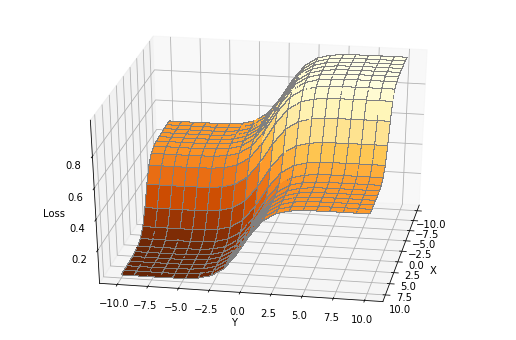

In [28]:
# plot
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(_X, _Y, error_surface, cmap=cm.YlOrBr_r, edgecolor='gray', linewidth=0.004, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')

ax.view_init(30, 370)
plt.show()